In [209]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly as px
import warnings
warnings.filterwarnings(action='ignore')

### Understanding Dataset

In [210]:
# LOADING DATASET

df = pd.read_csv("Attrition Data_1.csv")
df.head()

,Age,Attrition,Department,DistanceFromHome(Km),Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtPresentCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4.0,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2.0,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3.0,Single,$2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,NaN,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2.0,Married,$3468,9,3,2


In [211]:
# DIMENSIONS OF DATASET
df.shape

(1470, 13)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   Department               1470 non-null   object 
 3   DistanceFromHome(Km)     1470 non-null   int64  
 4   Education                1470 non-null   int64  
 5   EducationField           1470 non-null   object 
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobSatisfaction          1354 non-null   float64
 8   MaritalStatus            1470 non-null   object 
 9   MonthlyIncome            1470 non-null   object 
 10  NumCompaniesWorked       1470 non-null   int64  
 11  WorkLifeBalance          1470 non-null   int64  
 12  YearsAtPresentCompany    1470 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 149.4+ KB


In [213]:
# STATISTICAL SUMMARY OF NUMERICAL COLUMNS
df.describe()

,Age,DistanceFromHome(Km),Education,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,WorkLifeBalance,YearsAtPresentCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1354.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.717873,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.105729,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,9.000000,4.000000,40.000000


In [214]:
# STATISTICAL SUMMARY OF CATEGORICAL COLUMNS
df.describe(include='object')

,Attrition,Department,EducationField,MaritalStatus,MonthlyIncome
count,1470,1470,1470,1470,1470
unique,2,3,6,3,1349
top,No,Research & Development,Life Sciences,Married,2342
freq,1233,961,606,673,4


### DATA PRE-PROCESSING

In [215]:
# CHECKING FOR DUPLICATE RECORDS
df[df.duplicated()]

,Age,Attrition,Department,DistanceFromHome(Km),Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtPresentCompany


In [216]:
# CHECKING ANOMALIES IN DATASET
df['MonthlyIncome'].unique()

array(['5993', '5130', '$2090', ..., '9991', '5390', '4404'], dtype=object)

In [217]:
# REMOVING $ FROM COLUMN 'MONTHLYINCOME'

df['MonthlyIncome'] = df['MonthlyIncome'].str.replace('$','')
df['MonthlyIncome'].unique()

array(['5993', '5130', '2090', ..., '9991', '5390', '4404'], dtype=object)

In [218]:
# CHANGING ITS DATATYPE TO NUMERIC
df['MonthlyIncome'] = df['MonthlyIncome'].astype('float64')

<AxesSubplot:>

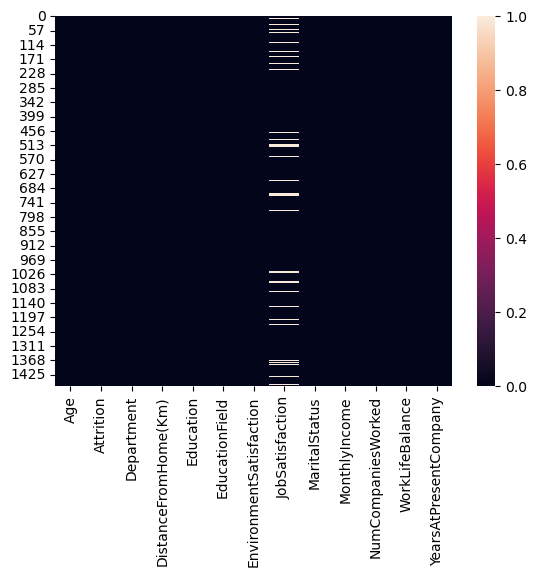

In [219]:
# CHECKING PRESENCE OF NULL VALUES
sns.heatmap(df.isnull())

In [220]:
df.isnull().sum()/len(df)

Age                        0.000000
Attrition                  0.000000
Department                 0.000000
DistanceFromHome(Km)       0.000000
Education                  0.000000
EducationField             0.000000
EnvironmentSatisfaction    0.000000
JobSatisfaction            0.078912
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.000000
WorkLifeBalance            0.000000
YearsAtPresentCompany      0.000000
dtype: float64

In [221]:
# LOGICAL IMPUTATION OF NULL VALUE IN COLUMN 'JOB-SATISFACTION'
df['JobSatisfaction']=df.groupby('Department')['JobSatisfaction'].transform(lambda x:x.fillna(x.mode()[0]))

In [222]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome(Km)       0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtPresentCompany      0
dtype: int64

In [223]:
#Feature Engineering (Converting the encoded columns into categorical columns to have better interpretation and visualization)

def job(a):
    if a==1:
        return 'Low'
    elif a==2:
        return 'Medium'
    elif a==3:
        return 'High'
    else:
        return 'Very High'
df['Job_Satisfaction'] = df['JobSatisfaction'].apply(job)


def balance(a):
    if a==1:
        return 'Bad'
    elif a==2:
        return 'Good'
    elif a==3:
        return 'Better'
    else:
        return 'Best'
df['W-L_Balance'] = df['WorkLifeBalance'].apply(balance)


def edu(a):
    if a==1:
        return 'Below College'
    elif a==2:
        return 'College'
    elif a==3:
        return 'Bachelor Degree'
    elif a==4:
        return 'Master Degree'
    else:
        return 'Doctrate'
df['Educational_Qualification'] = df['Education'].apply(edu)

In [224]:
# CHECKING FOR REDUNDANT COLUMNS THROUGH STD()

df.std()

Age                           9.135373
DistanceFromHome(Km)          8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.081042
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtPresentCompany         6.126525
dtype: float64

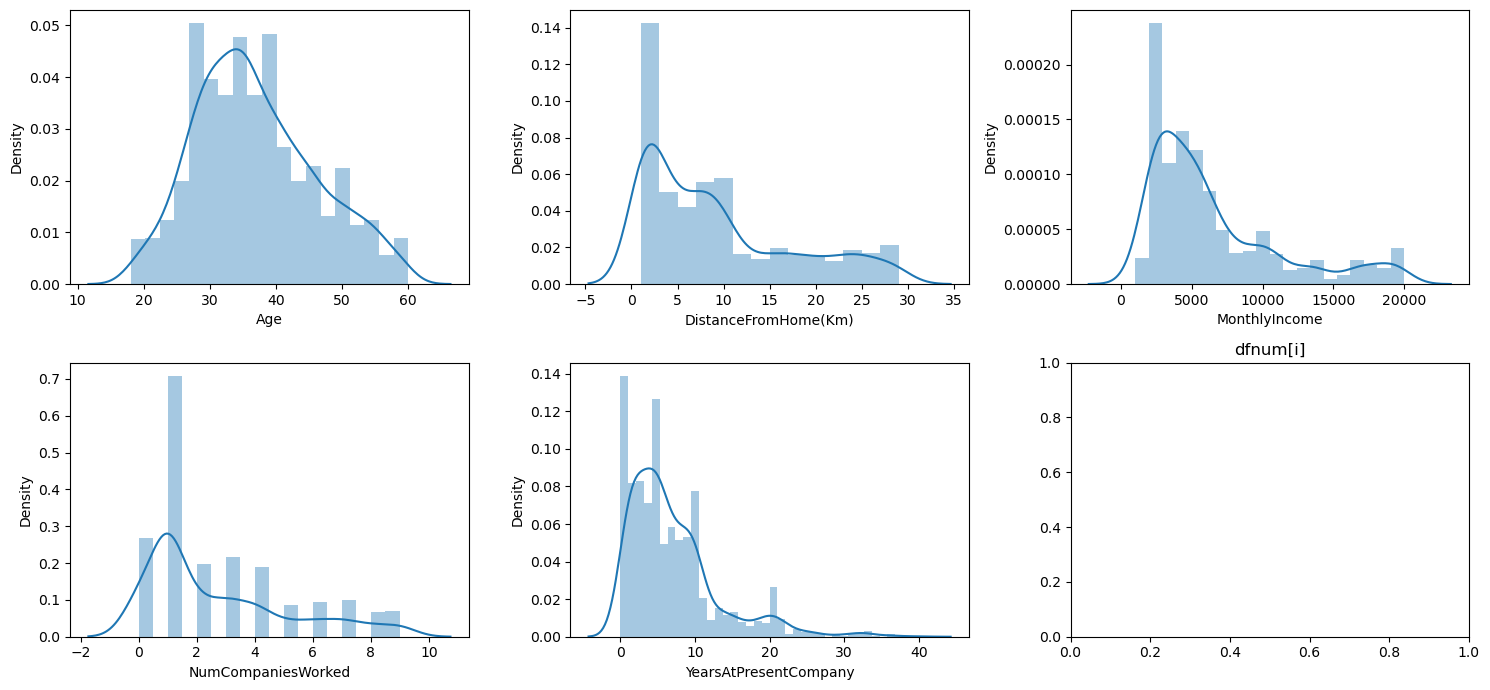

In [225]:
# CHECKING FOR SKEWNESS

dfnum = df.select_dtypes(include=np.number).drop(['Education',
       'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'], axis=1)
fig,ax= plt.subplots(2,3,figsize=(15,7))
for i ,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

# Columns other than 'age' have right skewness. Skewness should be treated in order to get reliable results from statistical
# tests and model building

In [226]:
dfnum.skew()

Age                      0.413286
DistanceFromHome(Km)     0.958118
MonthlyIncome            1.369817
NumCompaniesWorked       1.026471
YearsAtPresentCompany    1.764529
dtype: float64

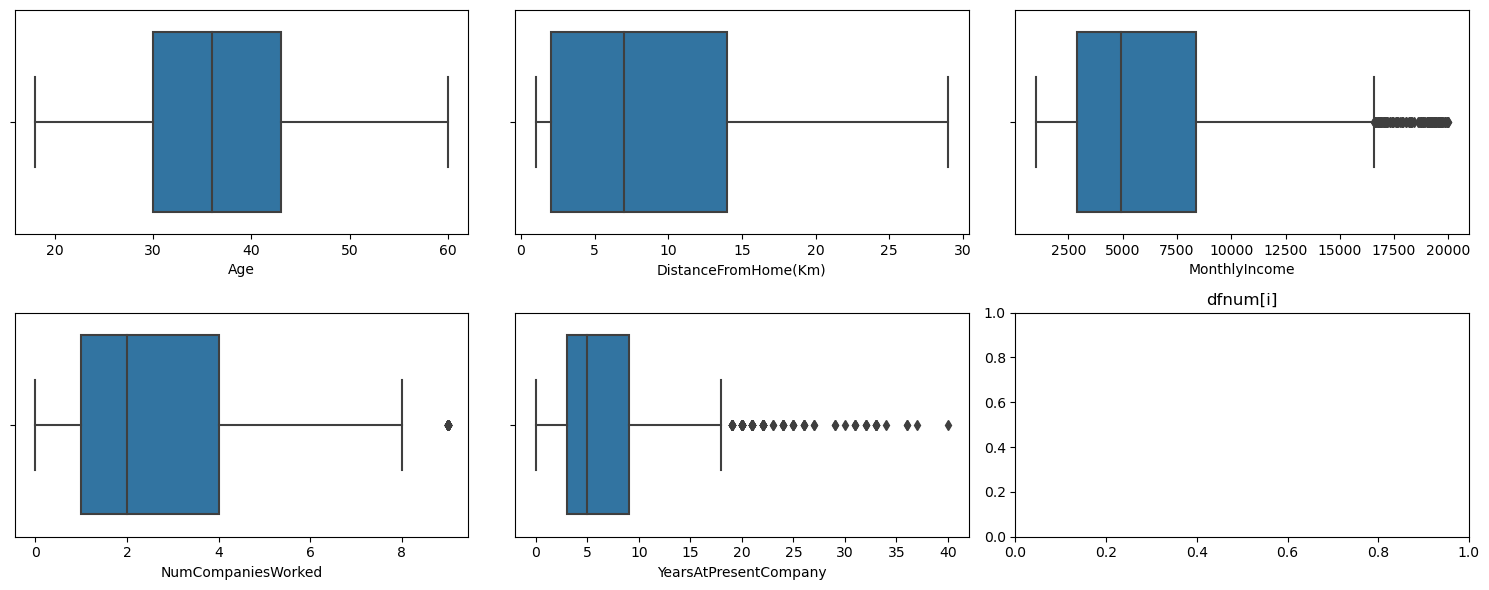

In [227]:
# CHECKING PRESENCE OF OUTLIERS

dfnum = df.select_dtypes(include=np.number).drop(['Education',
       'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'], axis=1)
fig,ax= plt.subplots(2,3,figsize=(15,6))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

In [228]:
# TREATING SKEWNESS AND OUTLIERS THROUGH TRANSFORMATION

from sklearn.preprocessing import PowerTransformer

p=PowerTransformer(method='yeo-johnson')
df['DistanceFromHome(Km)']=p.fit_transform(df[['DistanceFromHome(Km)']])

#p=PowerTransformer(method='yeo-johnson')
df['MonthlyIncome']=np.sqrt(df[['MonthlyIncome']])

p=PowerTransformer(method='yeo-johnson')
df['YearsAtPresentCompany']=p.fit_transform(df[['YearsAtPresentCompany']])


<AxesSubplot:xlabel='YearsAtPresentCompany', ylabel='Density'>

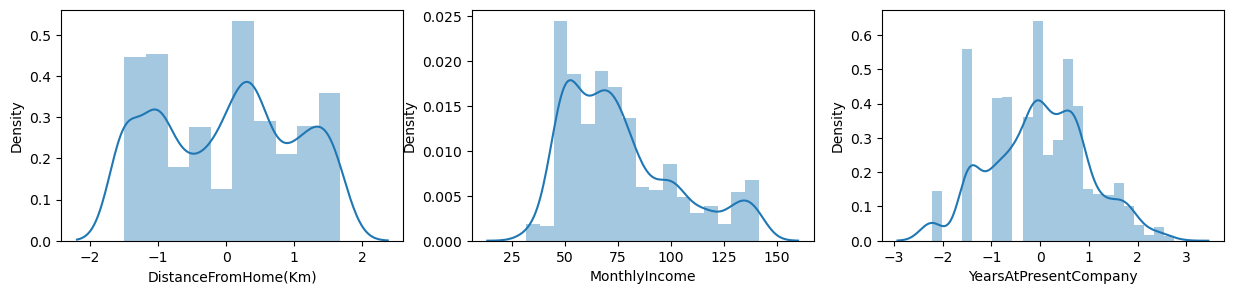

In [229]:
# DISTRIBUTION AFTER TRANSFORMATION

plt.figure(figsize=(15,3))
plt.subplot(131)
sns.distplot(df['DistanceFromHome(Km)'])

plt.subplot(132)
sns.distplot(df['MonthlyIncome'])

plt.subplot(133)
sns.distplot(df['YearsAtPresentCompany'])


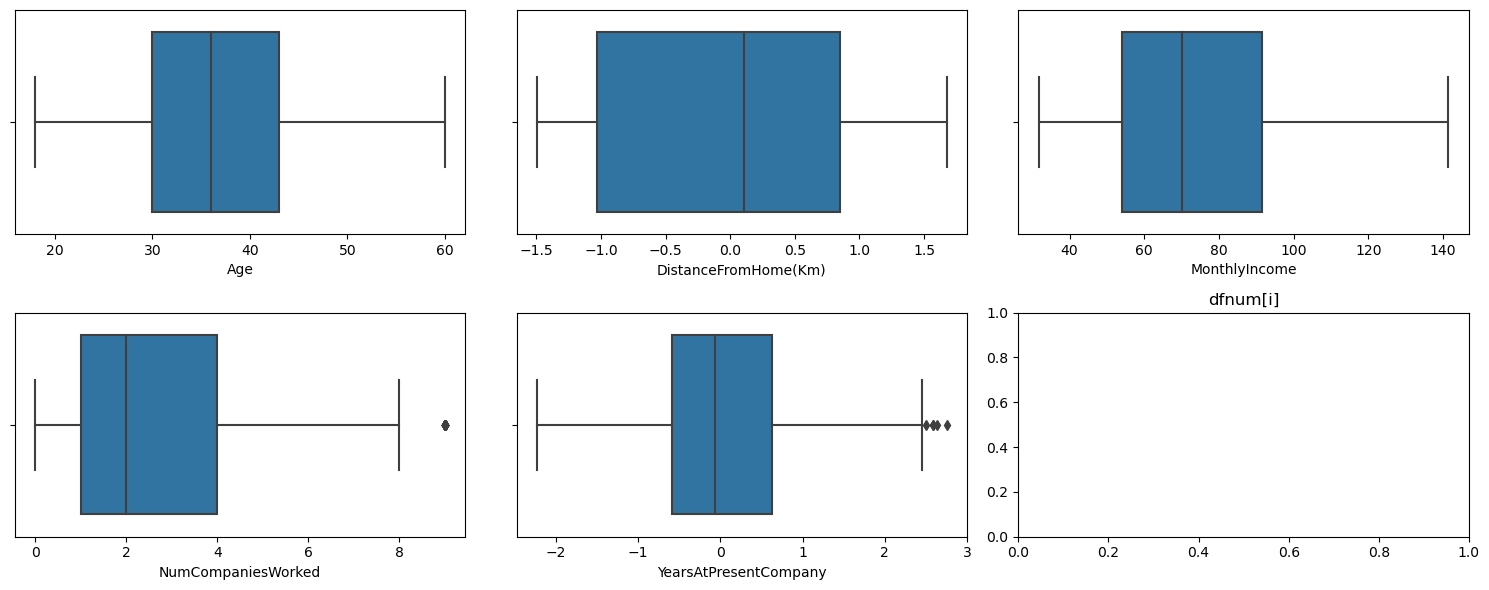

In [230]:
# OUTLIERS AFTER TRANSFORMATION

dfnum = df.select_dtypes(include=np.number).drop(['Education',
       'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'], axis=1)
fig,ax= plt.subplots(2,3,figsize=(15,6))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

In [231]:
# STATISTICAL TEST TO IDENTIFY SIGNIFICANT VARIABLES W.R.T TARGET VARIABLE

# H0: Independent column is not related to target variable. Independent column is not significant
# H1: Independent column is related to target variable. Independent column is significant

l=[]
sig_col=[]
from scipy.stats import chi2_contingency
dfcat = df.select_dtypes(include='object')
for i in dfcat:
    c=pd.crosstab(dfcat[i],df['Attrition'])
    z,pv,dof,ar=chi2_contingency(c)
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    l.append(pv)
    if pv<0.05:
        print('Reject Null Hyp., Conclude: The column is Significant')
        sig_col.append(i)
    else:
        print('Fail to reject Null Hyp., conclude: The column is not significant')
        
    print('_______________________________________________________')
print()
print('Significant columns: ',sig_col)

column name:  Attrition , P_value:  0.0 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  Department , P_value:  0.004525606574479633 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  EducationField , P_value:  0.006773980139025212 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  MaritalStatus , P_value:  9.45551106034083e-11 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  Job_Satisfaction , P_value:  0.0004910431698073551 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
colu

In [232]:
# STATISTICAL TEST TO IDENTIFY SIGNIFICANT VARIABLES W.R.T TARGET VARIABLE

# H0: Independent column is not related to target variable. Independent column is not significant
# H1: Independent column is related to target variable. Independent column is significant

l=[]
sig_col=[]
import scipy.stats as stats
dfnum = ['Age','DistanceFromHome(Km)', 'MonthlyIncome', 'NumCompaniesWorked','YearsAtPresentCompany']
for i in dfnum:
    att_yes = df[df['Attrition']=='Yes'][i]
    att_no = df[df['Attrition']=='No'][i]
    stat,pv= stats.f_oneway(att_yes, att_no)
    print('column name: ',i,', P_value: ',pv, ', Significance level: 0.05 (5%)')
    l.append(pv)
    if pv<0.05:
        print('Reject Null Hyp., Conclude: The column is Significant')
        sig_col.append(i)
    else:
        print('Fail to reject Null Hyp., conclude: The column is not significant')
        
    print('_______________________________________________________')
    
print('Significant columns: ',sig_col)

column name:  Age , P_value:  8.356308021102401e-10 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  DistanceFromHome(Km) , P_value:  0.0026929218273934576 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  MonthlyIncome , P_value:  5.21151079179944e-12 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_______________________________________________________
column name:  NumCompaniesWorked , P_value:  0.09552526205649159 , Significance level: 0.05 (5%)
Fail to reject Null Hyp., conclude: The column is not significant
_______________________________________________________
column name:  YearsAtPresentCompany , P_value:  7.447532108029961e-14 , Significance level: 0.05 (5%)
Reject Null Hyp., Conclude: The column is Significant
_________________

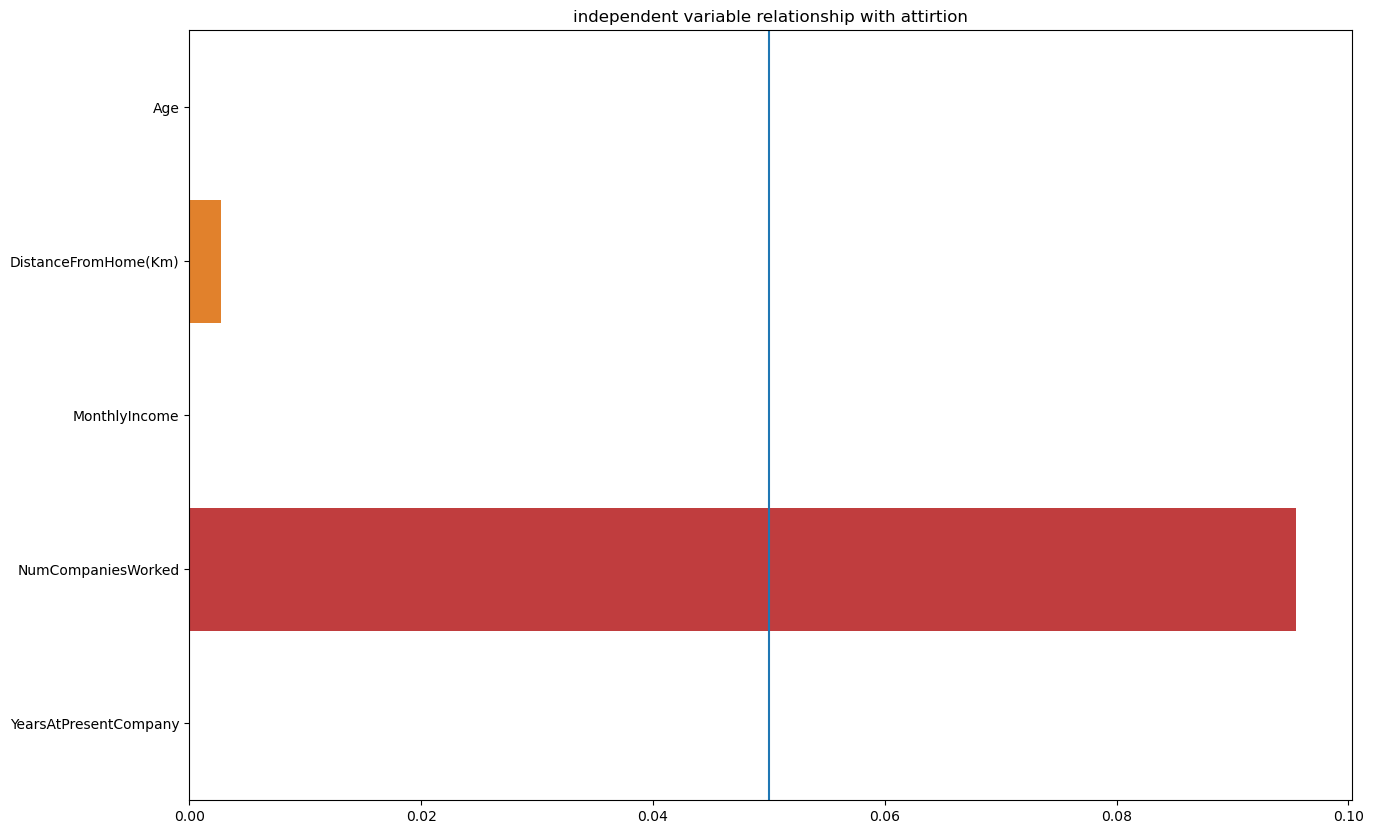

In [233]:
# visual representation of significant numerical column

plt.figure(figsize=(15,10))
sns.barplot(l, dfnum)
plt.title('independent variable relationship with attirtion')
plt.axvline(x=0.05)

### VISUAL ANALYSIS OF DATA

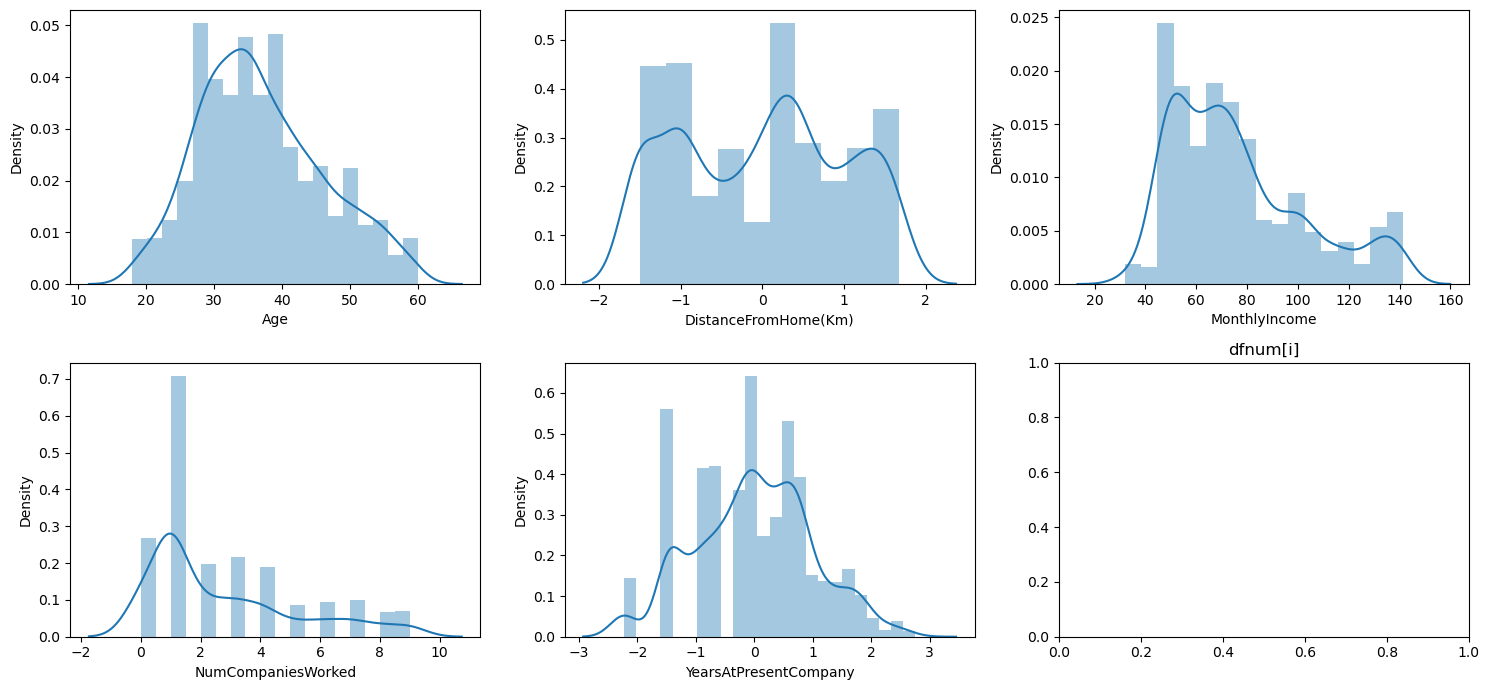

In [234]:
# DISTRIBUTION OF NUMERICAL COLUMNS IN DATASET (UNIVARIATE ANALYSIS)

dfnum = df.select_dtypes(include=np.number).drop(['Education',
       'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'], axis=1)
fig,ax= plt.subplots(2,3,figsize=(15,7))
for i ,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

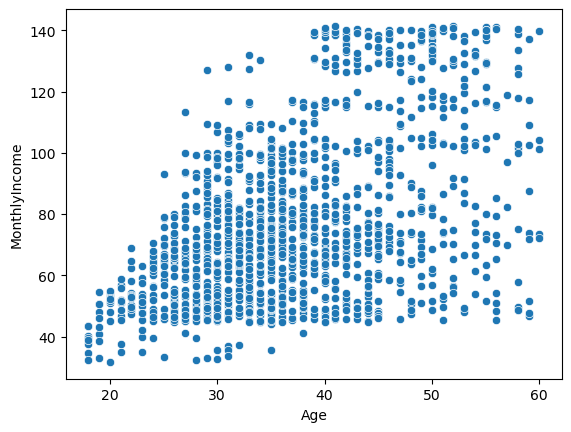

In [235]:
# SCATTERPLOTS TO IDENTIFY RELATIONSHIP BETWEEN INDEPENDENT NUMERICAL COLUMNS

sns.scatterplot(df['Age'], df['MonthlyIncome'])

<AxesSubplot:xlabel='YearsAtPresentCompany', ylabel='MonthlyIncome'>

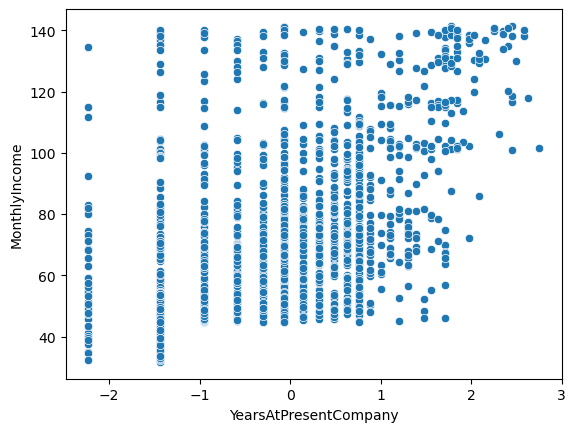

In [236]:
sns.scatterplot(df['YearsAtPresentCompany'], df['MonthlyIncome'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

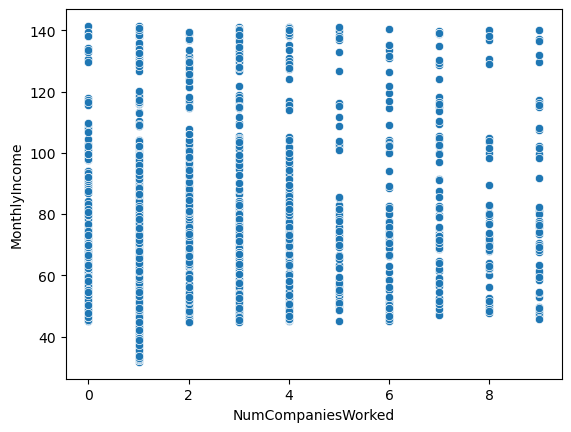

In [237]:
sns.scatterplot(df['NumCompaniesWorked'], df['MonthlyIncome'])

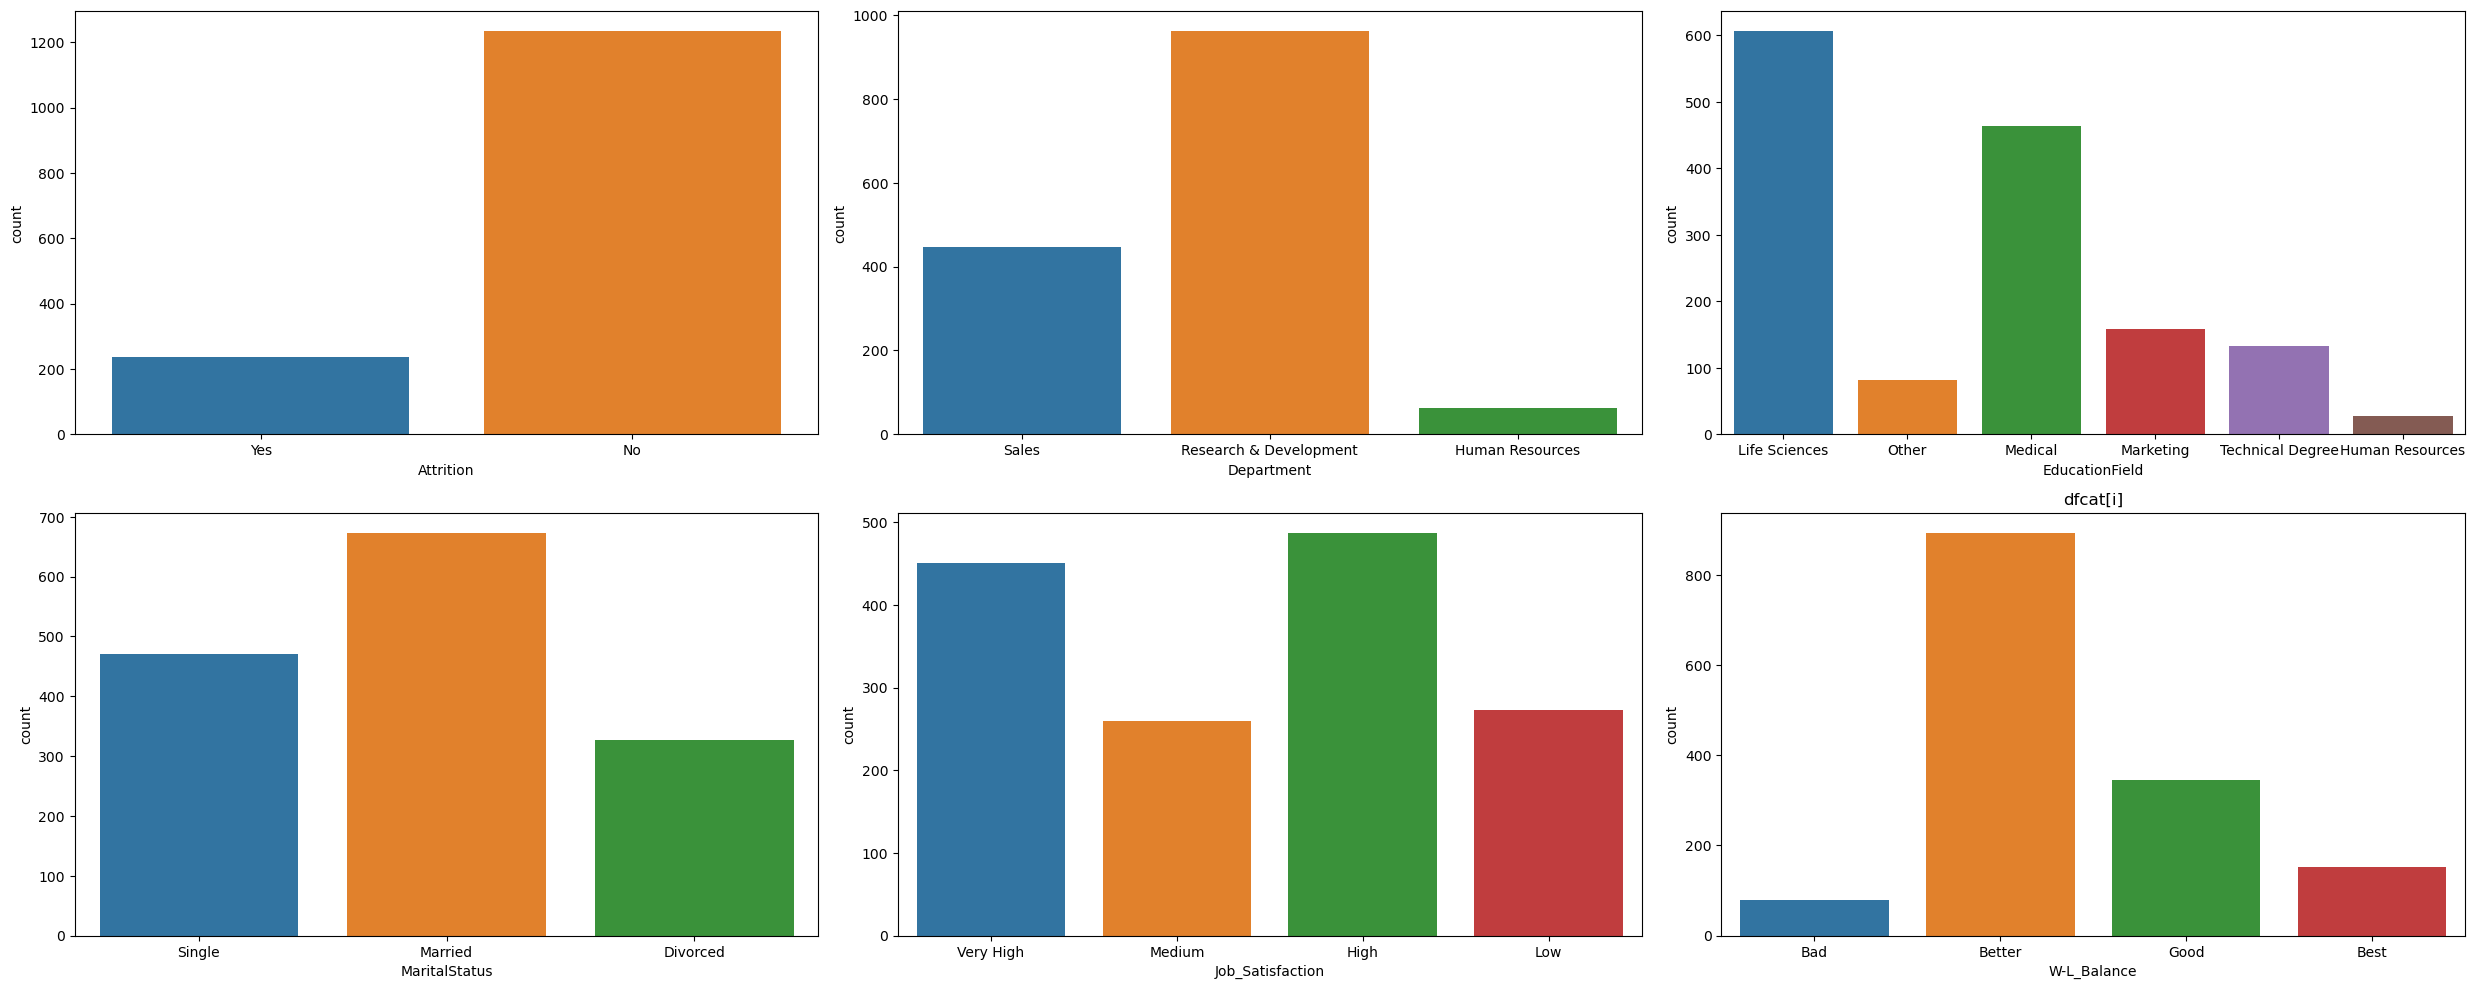

In [238]:
# DISTRIBUTION OF CATEGORICAL COLUMNS IN DATASET (UNIVARIATE ANALYSIS)

fig,ax= plt.subplots(2,3,figsize=(25,10))
for i ,subplots in zip(dfcat ,ax.flatten()):
    sns.countplot(dfcat[i],ax=subplots)
    plt.title('dfcat[i]')
plt.tight_layout()

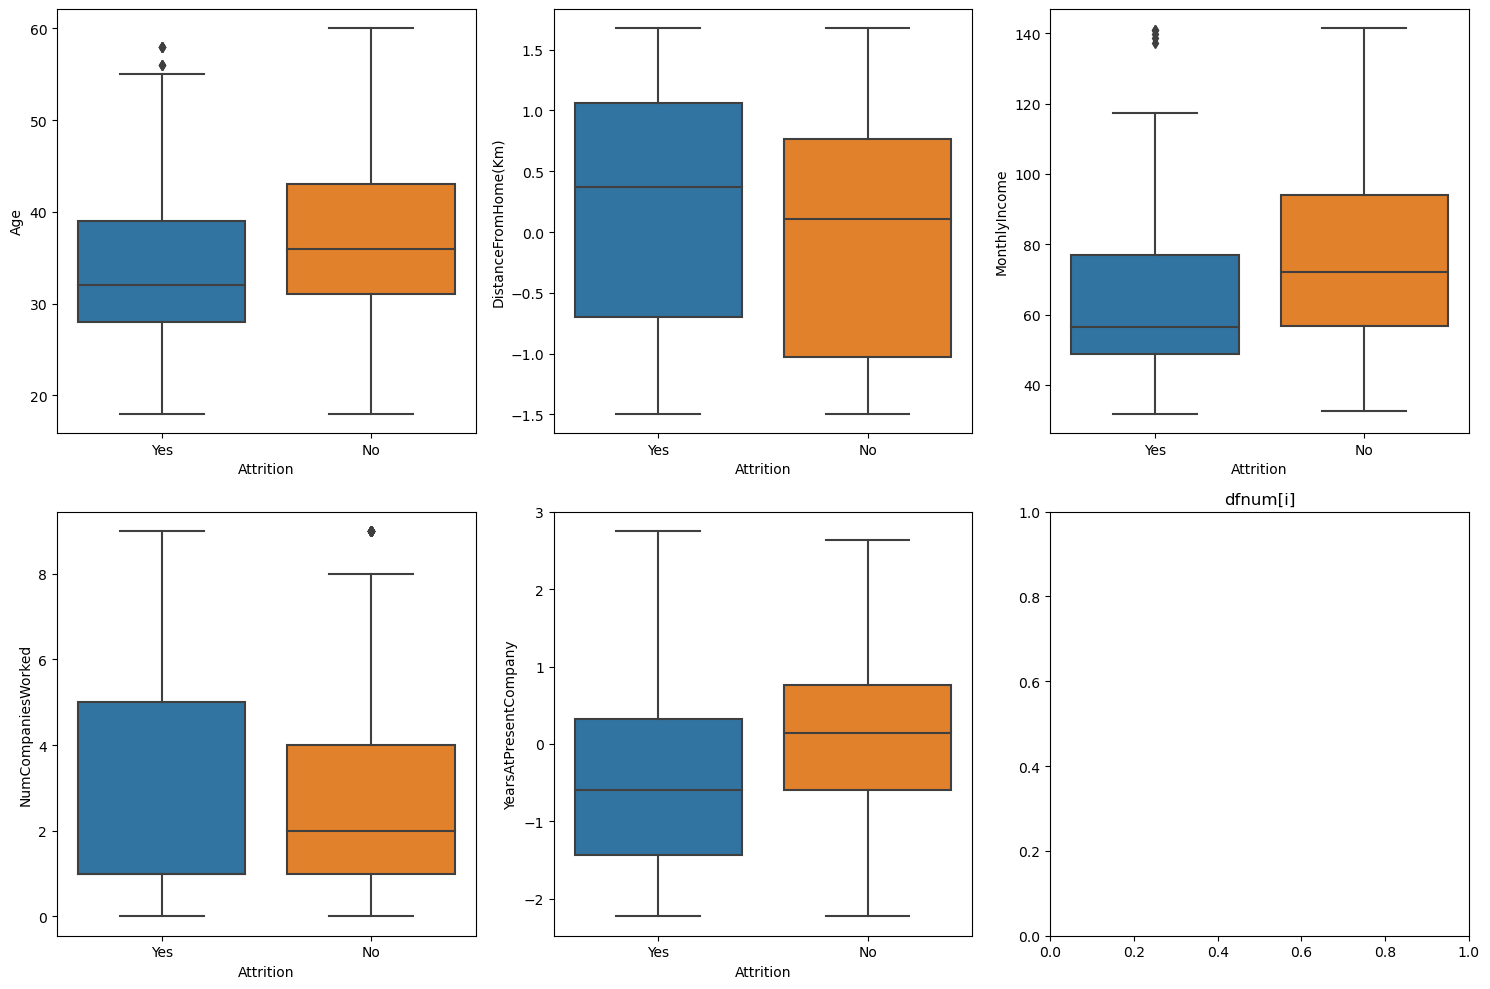

In [239]:
# NUMERICAL COLUMNS V/S TARGET VARIABLE (BIVARIATE ANALYSIS)

dfnum = df.select_dtypes(include=np.number).drop(['Education',
       'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'], axis=1)
fig,ax= plt.subplots(2,3,figsize=(15,10))
for i ,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(df['Attrition'],dfnum[i], ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

Findings and Inferences :
From these boxplots we can indentify which variables have significant effect on target variable. For different classes of target variable, if the boxplot is significantly different for a numerical variable than that variable has some effect upon target variable

1. Median 'age' of employees who attrited is less than employees who didn't. This may indicate that freshers or younger people switch more often.
2. Median 'distance from home to office' for employees who left is more than employees who didn't leave. However the difference is not very large.
3. Median 'monthly salary' of employees leaving is quite lower than employees who stayed. Salary could be a factor for employees switching to other organisation.

In [240]:
# DISTRIBUTION OF CONTINOUS NUMERICAL COLUMNS W.R.T TARGET VARIABLE

<AxesSubplot:xlabel='DistanceFromHome(Km)', ylabel='Probability'>

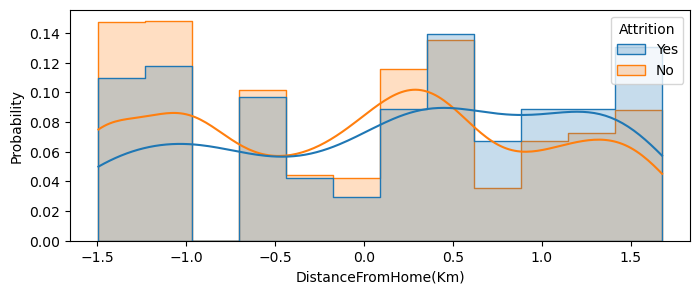

In [241]:
plt.figure(figsize=(8,3))
sns.histplot(
    df, x="DistanceFromHome(Km)", hue="Attrition", element="step",
    stat="probability", common_norm=False, kde=True, )


<AxesSubplot:xlabel='Age', ylabel='Probability'>

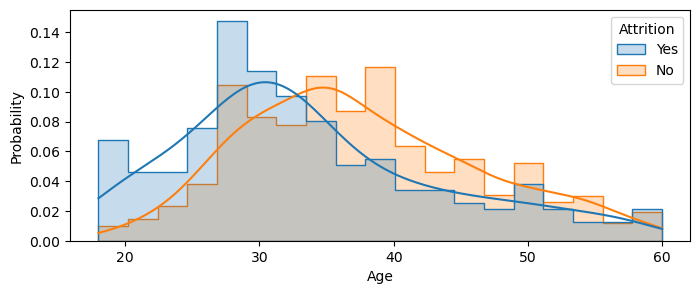

In [242]:
plt.figure(figsize=(8,3))
sns.histplot(
    df, x="Age", hue="Attrition", element="step",
    stat="probability", common_norm=False, kde=True, )


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Probability'>

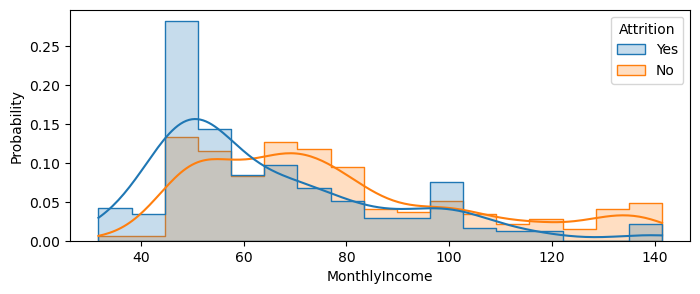

In [243]:
plt.figure(figsize=(8,3))
sns.histplot(
    df, x="MonthlyIncome", hue="Attrition", element="step",
    stat="probability", common_norm=False, kde=True, )


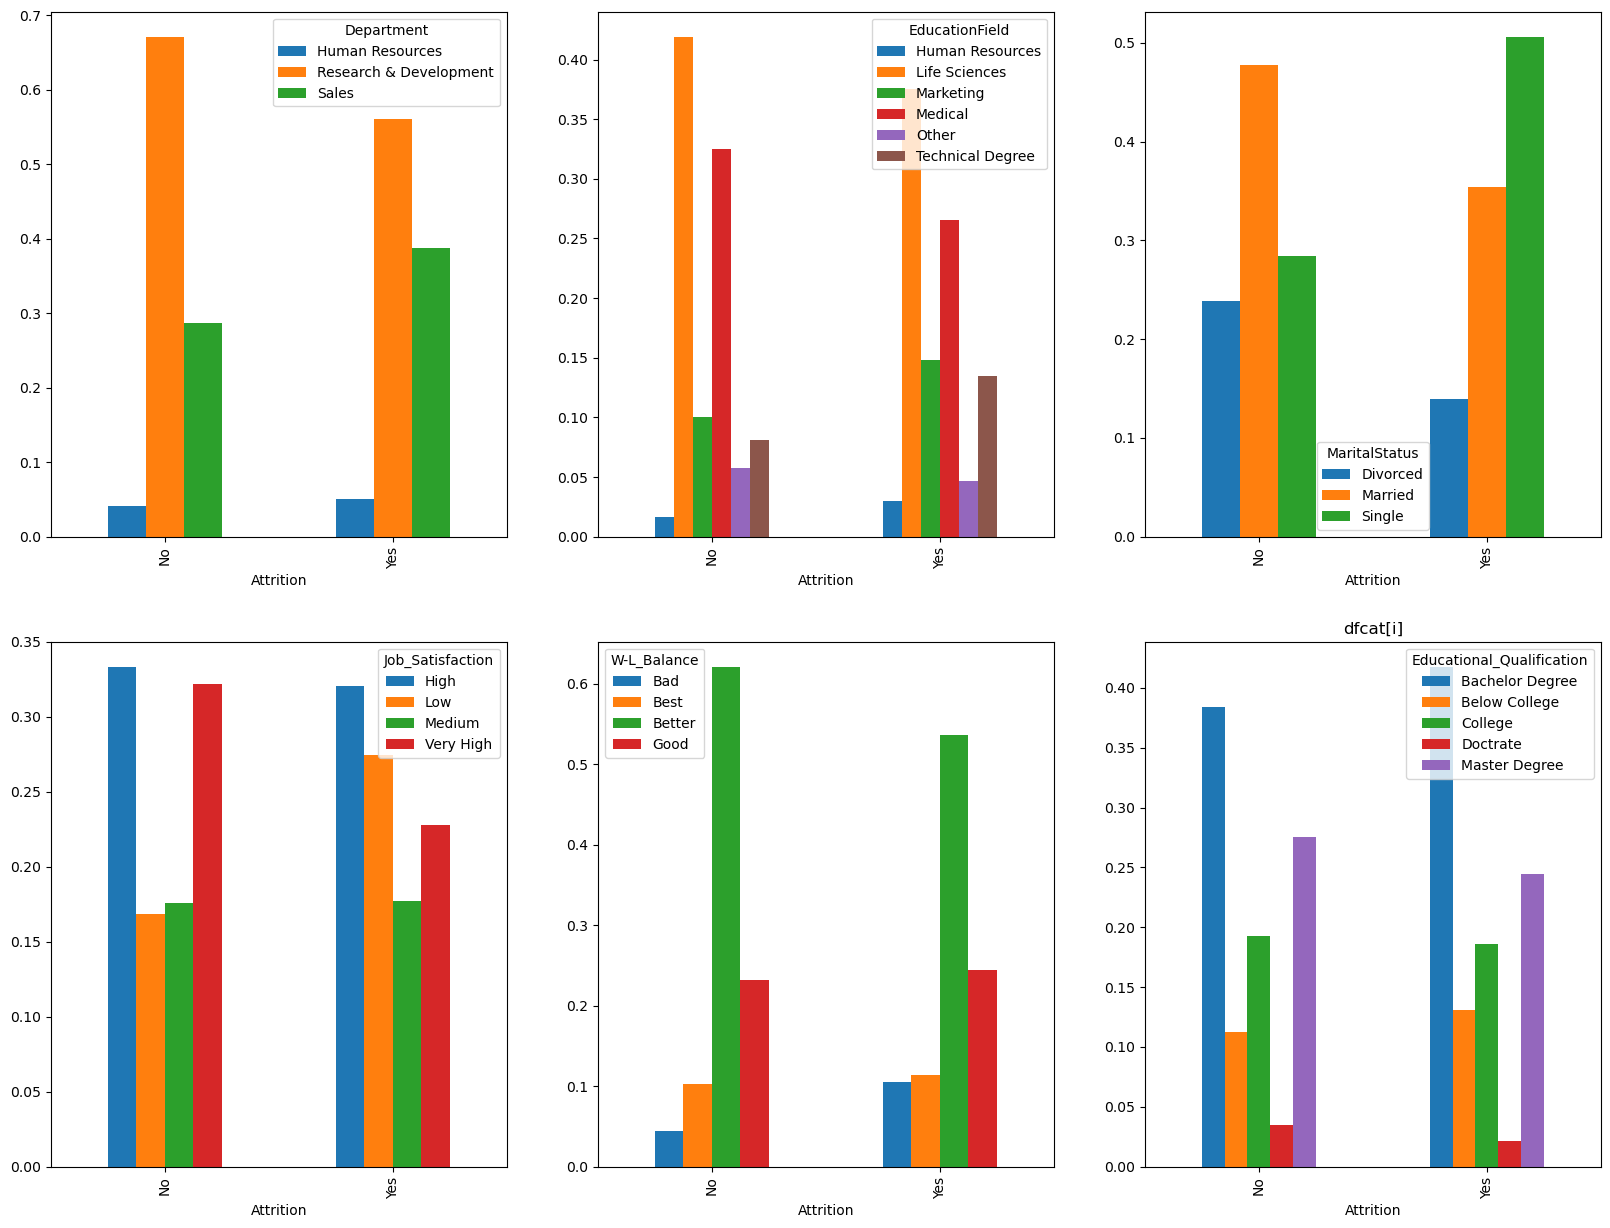

In [244]:
# CATEGORICAL COLUMNS V/S TARGET VARIABLE (BIVARIATE ANALYSIS)

dfcat=df.select_dtypes(include='object').drop('Attrition', axis=1)
fig,ax = plt.subplots(2,3,figsize=(20,15))

for i,subplot in zip(dfcat,ax.flatten()):
    
    pd.crosstab(df['Attrition'], dfcat[i], normalize= 'index').plot(kind='bar', ax= subplot)
    plt.title('dfcat[i]')


Findings and Inferences
1. Among Departments, Research and Development have the highest attrition(about 55%) followed by Sales. Attrition in Human resourceis comparatively low.
2. Employee from Education field of Life-science and medical constitute highest percentage among attrition. Employee from this background are mostly working in R&D department.
3. Highest percentage of employees who attrited this organisation had 'high' job_satisfaction. However, second highest percentage of employees who left, had 'low' job satisfaction.
4. Most of the attrited employees had 'better' work-life-balance, followed by 'good'.
5. Among employees who left, most of them had 'bachelors degree'(around 45%) as highest qualification. Employees with doctorate have least percentage of attrition 

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

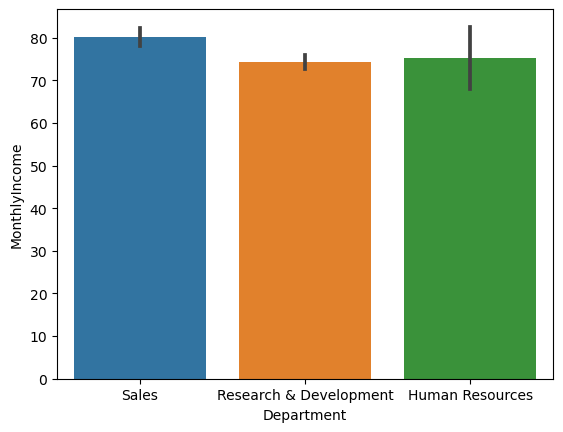

In [245]:
sns.barplot(df['Department'],df['MonthlyIncome'])

# The average monthly salary is lowest in R&D Dept. where attrition is highest

<AxesSubplot:xlabel='Job_Satisfaction', ylabel='MonthlyIncome'>

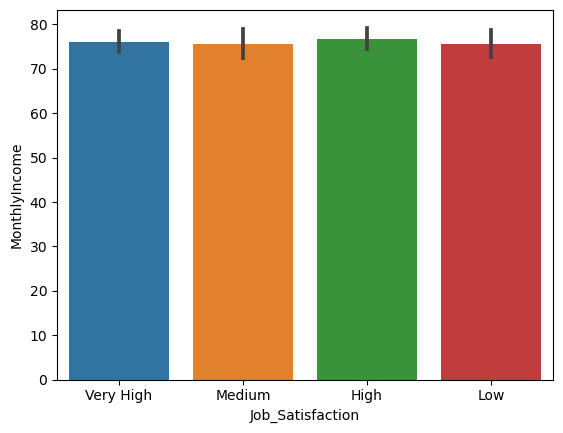

In [246]:
sns.barplot(df['Job_Satisfaction'],df['MonthlyIncome'])
# Average monthly income is similar across all types of job satisfaction. Income is not a major reason for lower 
# job-satisfaction in this organisation 

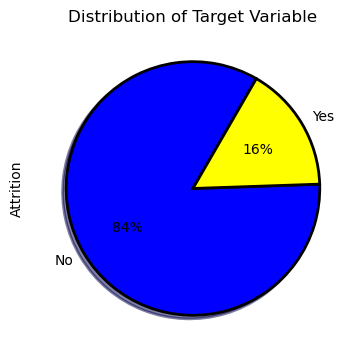

In [247]:
# CHECKING IMBALANCE IN TARGET VARIABLE

fig = plt.figure(figsize=(9,6))
plt.subplot(121)
df['Attrition'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['blue','yellow'],startangle = 60, wedgeprops={"linewidth":2 , "edgecolor":"k"}, shadow=True)
plt.title("Distribution of Target Variable")
plt.show()

#### Target variable has high imbalance of 84%-16% distribution. This distribution imbalance should be treated to built reliable models

### MODEL BUILDING

In [248]:
def att(a):
    if a=='Yes':
        return 1
    else:
        
        return 0
df['attrition'] = df['Attrition'].apply(att)    

In [249]:
# ENCODING CATEGORICAL COLUMNS

df = df.drop(['Job_Satisfaction','W-L_Balance', 'Educational_Qualification', 'Attrition'], axis=1)
dfcat = df.select_dtypes(include='object')#.drop('Attrition', axis=1)
dfen = pd.get_dummies(dfcat, drop_first=True)
dfnum= df.select_dtypes(include=np.number)
df = pd.concat([dfnum, dfen], axis=1)
df

,Age,DistanceFromHome(Km),Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtPresentCompany,attrition,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,-1.494085,2,2,4.0,77.414469,8,1,0.139692,1,0,1,1,0,0,0,0,0,1
1,49,0.243416,1,3,2.0,71.624018,1,3,0.762660,0,1,0,1,0,0,0,0,1,0
2,37,-1.031215,2,4,3.0,45.716518,6,3,-2.229592,1,1,0,0,0,0,1,0,0,1
3,33,-0.700347,4,4,3.0,53.935146,1,3,0.482432,0,1,0,1,0,0,0,0,1,0
4,27,-1.031215,1,1,2.0,58.889727,9,3,-0.951540,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.407126,2,3,4.0,50.705029,4,3,-0.066114,0,1,0,0,0,1,0,0,1,0
1466,39,-0.050827,1,4,3.0,99.954990,4,3,0.320677,0,1,0,0,0,1,0,0,1,0
1467,27,-0.442291,3,2,3.0,78.370913,1,3,0.139692,0,1,0,1,0,0,0,0,1,0
1468,49,-1.031215,3,4,2.0,73.416619,2,2,0.628829,0,0,1,0,0,1,0,0,1,0


In [250]:
# DATAFRAME AFTER APPLYING SMOTE TO TREAT CLASS IMBALANCE

x= df.drop('attrition', axis=1)
y=df.attrition
from imblearn.over_sampling import SMOTE
xr,yr=SMOTE(sampling_strategy=0.6).fit_resample(x,y)
df=pd.concat([xr,pd.DataFrame(yr)],axis=1)
df

,Age,DistanceFromHome(Km),Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtPresentCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,attrition
0,41,-1.494085,2,2,4.000000,77.414469,8,1,0.139692,0,1,1,0,0,0,0,0,1,1
1,49,0.243416,1,3,2.000000,71.624018,1,3,0.762660,1,0,1,0,0,0,0,1,0,0
2,37,-1.031215,2,4,3.000000,45.716518,6,3,-2.229592,1,0,0,0,0,1,0,0,1,1
3,33,-0.700347,4,4,3.000000,53.935146,1,3,0.482432,1,0,1,0,0,0,0,1,0,0
4,27,-1.031215,1,1,2.000000,58.889727,9,3,-0.951540,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,34,1.176956,3,1,3.954896,72.679650,7,2,-0.128102,0,0,0,0,0,0,0,0,0,1
1968,32,-0.442291,3,4,3.434731,101.209231,0,2,1.070910,0,1,0,0,0,0,0,0,0,1
1969,31,0.954169,3,3,2.696164,51.586594,0,2,-1.025813,0,0,0,0,0,0,0,1,0,1
1970,29,1.302077,2,3,3.711043,49.878016,1,2,-1.299170,1,0,0,0,0,0,0,0,0,1


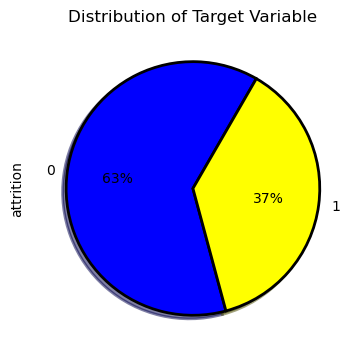

In [251]:
# CLASS IS MORE BALANCED NOW

fig = plt.figure(figsize=(9,6))
plt.subplot(121)
df['attrition'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['blue','yellow'],startangle = 60, wedgeprops={"linewidth":2 , "edgecolor":"k"}, shadow=True)
plt.title("Distribution of Target Variable")
plt.show()

In [252]:
# BUILDING BASE MODEL WITH LOGISTIC REGRESSION AS IT IS A BINARY CLASSIFICATION AND LESS COMPLEX DATASET. LOGISTIC REGRESSION
# IS APPLIED WITH ALL ITS DEFAULT PARAMETERS IN BASE MODEL.

In [253]:
# Base model: logistic regression.

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

lr.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve, confusion_matrix
accuracy_score(ytest,lr.predict(xtest))

print('Training data report')
print(classification_report(ytrain,lr.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,lr.predict(xtest)))


Training data report
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       863
           1       0.86      0.63      0.73       517

    accuracy                           0.82      1380
   macro avg       0.84      0.78      0.80      1380
weighted avg       0.83      0.82      0.82      1380


Test data report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       370
           1       0.89      0.68      0.77       222

    accuracy                           0.85       592
   macro avg       0.86      0.81      0.83       592
weighted avg       0.85      0.85      0.84       592



Inference- The model is not in overfit state as the train and test scores are similar. As per the domain and problem statement we can aim to optimize f1score as it is the harmonic mean of both recall and precision. Since the data had class imbalance, Accuracy score can be biased and not relaible. Avg. F1-score in this model is 0.82

In [254]:
# Second Base Model: Decision Tree (with default parameters)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt1=DecisionTreeClassifier()
dt1.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,dt1.predict(xtest))

print('Training data report')
print(classification_report(ytrain,dt1.predict(xtrain)))

print()
print('Test data report')
print(classification_report(ytest,dt1.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380


Test data report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       370
           1       0.66      0.74      0.70       222

    accuracy                           0.76       592
   macro avg       0.75      0.76      0.75       592
weighted avg       0.77      0.76      0.76       592



Inference- DT Model without constraints is in overfit state as the training score is very high and test score is much lower. Hyperparameters can be tuned to treat overfitting 

In [255]:
# Getting important features

dfeat = pd.DataFrame()
dfeat['Variable'] = xtrain.columns
dfeat['Importance'] = dt1.feature_importances_
tempdf = dfeat.sort_values(by= 'Importance', ascending= False)
tempdf

,Variable,Importance
8,YearsAtPresentCompany,0.148961
0,Age,0.142963
5,MonthlyIncome,0.107656
4,JobSatisfaction,0.086453
1,DistanceFromHome(Km),0.074802
3,EnvironmentSatisfaction,0.065603
7,WorkLifeBalance,0.052775
16,MaritalStatus_Married,0.049789
13,EducationField_Medical,0.048535
6,NumCompaniesWorked,0.047245


<AxesSubplot:xlabel='Importance', ylabel='Variable'>

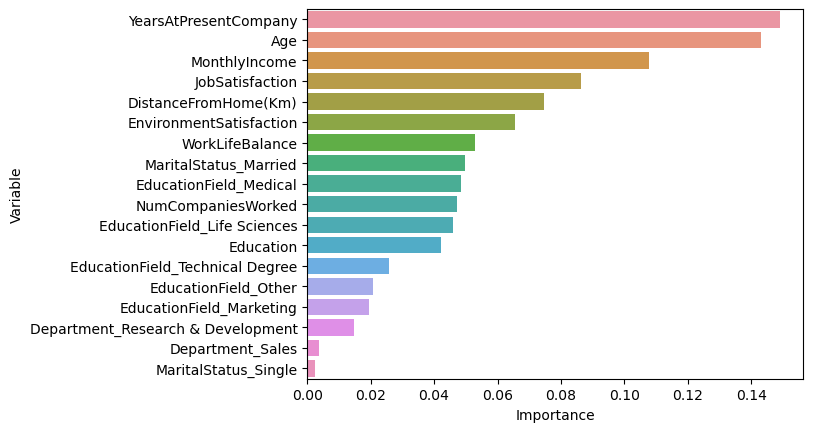

In [256]:
sns.barplot(tempdf['Importance'], tempdf['Variable'])

In [257]:
# Decision Tree with Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)

p={'criterion':['gini','entropy'],'min_samples_leaf':[i for i in range(1,20)],'max_depth':[i for i in range(14)]}

m=GridSearchCV(cv=5,estimator=DecisionTreeClassifier(),param_grid=p)

m.fit(xtrain,ytrain)

print(m.best_params_)
print(m.best_score_)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2}
0.7934782608695652
Training data report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       863
           1       0.97      0.90      0.94       517

    accuracy                           0.95      1380
   macro avg       0.96      0.94      0.95      1380
weighted avg       0.95      0.95      0.95      1380


Test data report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       370
           1       0.70      0.64      0.67       222

    accuracy                           0.76       592
   macro avg       0.75      0.74      0.74       592
weighted avg       0.76      0.76      0.76       592



Inference- Hyperparameter tuning has reduced the overfitting somewhat but still its not giving good results

In [258]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

[[863   0]
 [  0 517]]

Test data report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           1       0.92      0.76      0.83       222

    accuracy                           0.89       592
   macro avg       0.89      0.86      0.87       592
weighted avg       0.89      0.89      0.88       592

[[355  15]
 [ 53 169]]


Inference- The RF model with default parameters is in overfit state. we can tune its parameters to prevent overfitting 

In [259]:
## Random Forest with hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier(n_estimators=20, oob_score=True, max_depth=5)

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       863
           1       0.91      0.63      0.74       517

    accuracy                           0.84      1380
   macro avg       0.86      0.79      0.81      1380
weighted avg       0.85      0.84      0.83      1380

[[829  34]
 [193 324]]

Test data report
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       370
           1       0.86      0.56      0.68       222

    accuracy                           0.80       592
   macro avg       0.82      0.75      0.77       592
weighted avg       0.81      0.80      0.79       592



Inference- The RF model with hyperparameter tuning have resulted in good scores and the model is not in overfit state.

In [260]:
# Ensembling model: AdaBoost

xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.3,stratify=yr,random_state=10)
m=AdaBoostClassifier()

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))


Training data report
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       863
           1       0.85      0.77      0.81       517

    accuracy                           0.86      1380
   macro avg       0.86      0.84      0.85      1380
weighted avg       0.86      0.86      0.86      1380


Test data report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       370
           1       0.82      0.78      0.80       222

    accuracy                           0.85       592
   macro avg       0.85      0.84      0.84       592
weighted avg       0.85      0.85      0.85       592



Inference- The model with adaboost ensembling is not in overfit state and has obtained good scores

In [261]:
# Ensembling model: GradientBoosting

m=GradientBoostingClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))
print(confusion_matrix(ytest,m.predict(xtest)))

Training data report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.96      0.82      0.88       517

    accuracy                           0.92      1380
   macro avg       0.93      0.90      0.91      1380
weighted avg       0.92      0.92      0.92      1380

[[843  20]
 [ 92 425]]

Test data report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       370
           1       0.88      0.80      0.84       222

    accuracy                           0.88       592
   macro avg       0.88      0.87      0.87       592
weighted avg       0.88      0.88      0.88       592

[[345  25]
 [ 44 178]]


Inference- The model with gradient boost ensembling has given better results than ada boost and also its not in overfit state

In [262]:
# Ensembling model: XGBoost
from xgboost import XGBClassifier
m=XGBClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('Training data report')
print(classification_report(ytrain,m.predict(xtrain)))
print(confusion_matrix(ytrain,m.predict(xtrain)))
print()
print('Test data report')
print(classification_report(ytest,m.predict(xtest)))


Training data report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

[[863   0]
 [  0 517]]

Test data report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.85      0.79      0.82       222

    accuracy                           0.87       592
   macro avg       0.87      0.85      0.86       592
weighted avg       0.87      0.87      0.87       592



Inference- XGBoost ensembling has resulted in overfitting of the model. 

In [263]:
from sklearn.ensemble import StackingClassifier
s=StackingClassifier([('rf',RandomForestClassifier(n_estimators=)),('gbc',GradientBoostingClassifier(n_estimators=10))])
s.fit(xtrain,ytrain)

print('Training data report')
print(classification_report(ytrain,s.predict(xtrain)))

print()
print('Test data report')
print(classification_report(ytest,s.predict(xtest)))

SyntaxError: invalid syntax (3952546793.py, line 2)

Inference- Model with voting classifier has overfitting.

In [ ]:
mdic = { 'model': ['Logistic Regression', 'Decision Tree', 'Decision Tree tuned', 'Random Forest', 'RandomForest tuned',
                   'Ada-Boost', 'XGBoost','Gradient Boost', 'Stacking Classifier'],
         'F1-Score':[0.82, 0.76, 0.76, 0.88, 0.80, 0.86, 0.88, 0.88, 0.85],
         'Accuracy':[0.84, 0.77, 0.78, 0.89, 0.83, 0.86, 0.89, 0.89, 0.86]}
model_df = pd.DataFrame(mdic)
model_df.sort_values(by='F1-Score', ascending=False)

Inference - From the above dataframe we get all the models with their f1-score and accuracy. Model with ensembling have resulted in high f1-scores. In this case we'll consider Gradient boost Model as the final one since it didn't have overfitting and achieved the highest f1-score(0.88) among all other models.

#### Conclusion and Suggestions :
1. Average distance from home of employees leaving the company is higher than the employees not leaving. So, distance from office can be a possible reason for attrition.
To tackle this, company can implement hybrid work culture (offc+ wfh) if not in place already. We also found the average distance from home to office is 9 km, so, company may also provide transportation facilities to employees having a distance more than 9km or more.


2. From the dataset we found that highest attrition occurred in RnD department and lowest in HR. further we also saw that RnD department had lowest avg monthly income among all departments. 
Therefore, if financial constraint is not a concern, then while planning next salary hike, RnD might be prioritized.


3. Other suggestions that can help-

-Offer competitive compensation and benefits packages.

-Provide opportunities for professional development and career growth.

-Recognize and reward high-performing employees.

-Offer a competitive and fair performance evaluation and promotion process.

-Address workplace conflicts and issues promptly and professionally.

-Provide a comprehensive onboarding process for new employees.

-Offer a comprehensive benefits package that includes health insurance, retirement plans, and other perks.

-Emphasize the importance of work-life balance and allow employees to take time off when necessary.